In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType
from pyspark.sql.functions import col



| Configuración | Qué controla (en simple) | Ejemplo mental |
|--------------|--------------------------|---------------|
| `spark.app.name = "spark_labs"` | Nombre de la aplicación Spark (solo identificación) | La **etiqueta del trabajo** en la Spark UI y logs |
| `spark.master = local[*]` | Dónde y con cuántos recursos corre Spark | Usar **todas las manos disponibles** de tu máquina |
| `spark.executor.cores = 2` | Cuántas tareas puede ejecutar un ejecutor al mismo tiempo | Un trabajador con **2 manos** hace **2 tareas en paralelo** |
| `spark.executor.memory = 4g` | Cuánta memoria tiene un ejecutor | Tamaño de la **mesa de trabajo** (si es chica, hay spill) |
| `spark.default.parallelism = 8` | Cuántas tareas se crean por defecto | Dividir el trabajo en **8 partes** |
| `spark.sql.shuffle.partitions = 16` | Cuántas particiones se crean después de un shuffle | Reordenar datos en **16 cajas nuevas** |
| `spark.sql.autoBroadcastJoinThreshold = 104857600` | Tamaño máximo para usar broadcast join (100 MB) | Copiar una **tabla pequeña** a todos |
| `spark.sql.adaptive.enabled = true` | Permite cambiar el plan durante la ejecución | Spark **corrige el camino** si algo va mal |

---

### Ejemplo completo con números reales
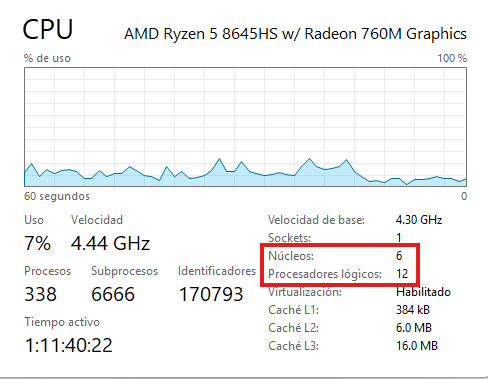
# Supongamos:
## Hardware
- Cores físicos: **6**
- RAM total: **16 GB**

## Configuración base

### Master
- `local[6]` → usa los 6 cores físicos

### Ejecutores
- `spark.executor.cores = 2`
- Ejecutores totales: **3** (6 / 2)

### Memoria
- RAM usable ≈ **12 GB** (75% de 16 GB)
- `spark.executor.memory = 4g` (12 / 3)

### Paralelismo
- `spark.default.parallelism = 12` (6 × 2)

### Shuffle
- `spark.sql.shuffle.partitions = 12` (6 × 2)

### Optimización
- `spark.sql.adaptive.enabled = true`

## Configuración final

```python
.master("local[6]")
.config("spark.executor.cores", "2")
.config("spark.executor.memory", "4g")
.config("spark.default.parallelism", "12")
.config("spark.sql.shuffle.partitions", "12")
.config("spark.sql.adaptive.enabled", "true")



In [2]:
spark = SparkSession.builder \
    .appName("spark_labs") \
    .master("local[6]") \
    .config("spark.executor.cores", "2") \
    .config("spark.executor.memory", "4g") \
    .config("spark.default.parallelism", "12") \
    .config("spark.sql.shuffle.partitions", "12") \
    .config("spark.sql.adaptive.enabled", "true") \
    .getOrCreate()

print(spark.sparkContext.uiWebUrl)
